# Importing Packages and looking into the dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading the file as saving to dataframe(df)

In [3]:
df=pd.read_csv('Indian Liver Patient Dataset (ILPD).csv')
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [4]:
# Checking dataframe to see if there are any missing values. There are two missing values

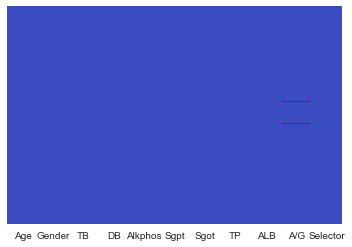

In [5]:
sns.heatmap(df.isnull(), cmap='coolwarm',xticklabels=True,yticklabels=False,cbar=False)

In [6]:
# Impute missing values by importing the Imputer class from sklearn.preprocessing

In [7]:
from sklearn.preprocessing import Imputer

In [8]:
imputer = Imputer(missing_values='NaN',strategy='mean',axis=0)

In [9]:
imputer = imputer.fit(df.iloc[:,9:10])

In [10]:
df.iloc[:,9:10]= imputer.transform(df.iloc[:,9:10])

In [11]:
# Checking for missing data again

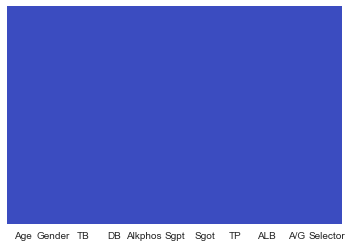

In [12]:
sns.heatmap(df.isnull(), cmap='coolwarm',xticklabels=True,yticklabels=False,cbar=False)

In [13]:
# Get some info on the dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age         583 non-null int64
Gender      583 non-null object
TB          583 non-null float64
DB          583 non-null float64
Alkphos     583 non-null int64
Sgpt        583 non-null int64
Sgot        583 non-null int64
TP          583 non-null float64
ALB         583 non-null float64
A/G         583 non-null float64
Selector    583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [15]:
df.drop('Selector',axis=1).describe()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [16]:
# Checking if data is skewed

In [17]:
df.skew()

Age         -0.029385
TB           4.907474
DB           3.212403
Alkphos      3.765106
Sgpt         6.549192
Sgot        10.546177
TP          -0.285672
ALB         -0.043685
A/G          0.995703
Selector     0.947140
dtype: float64

# Data Visualization

In [18]:
# As the heatmap shows there are no missing values. Now let's do some visalization.

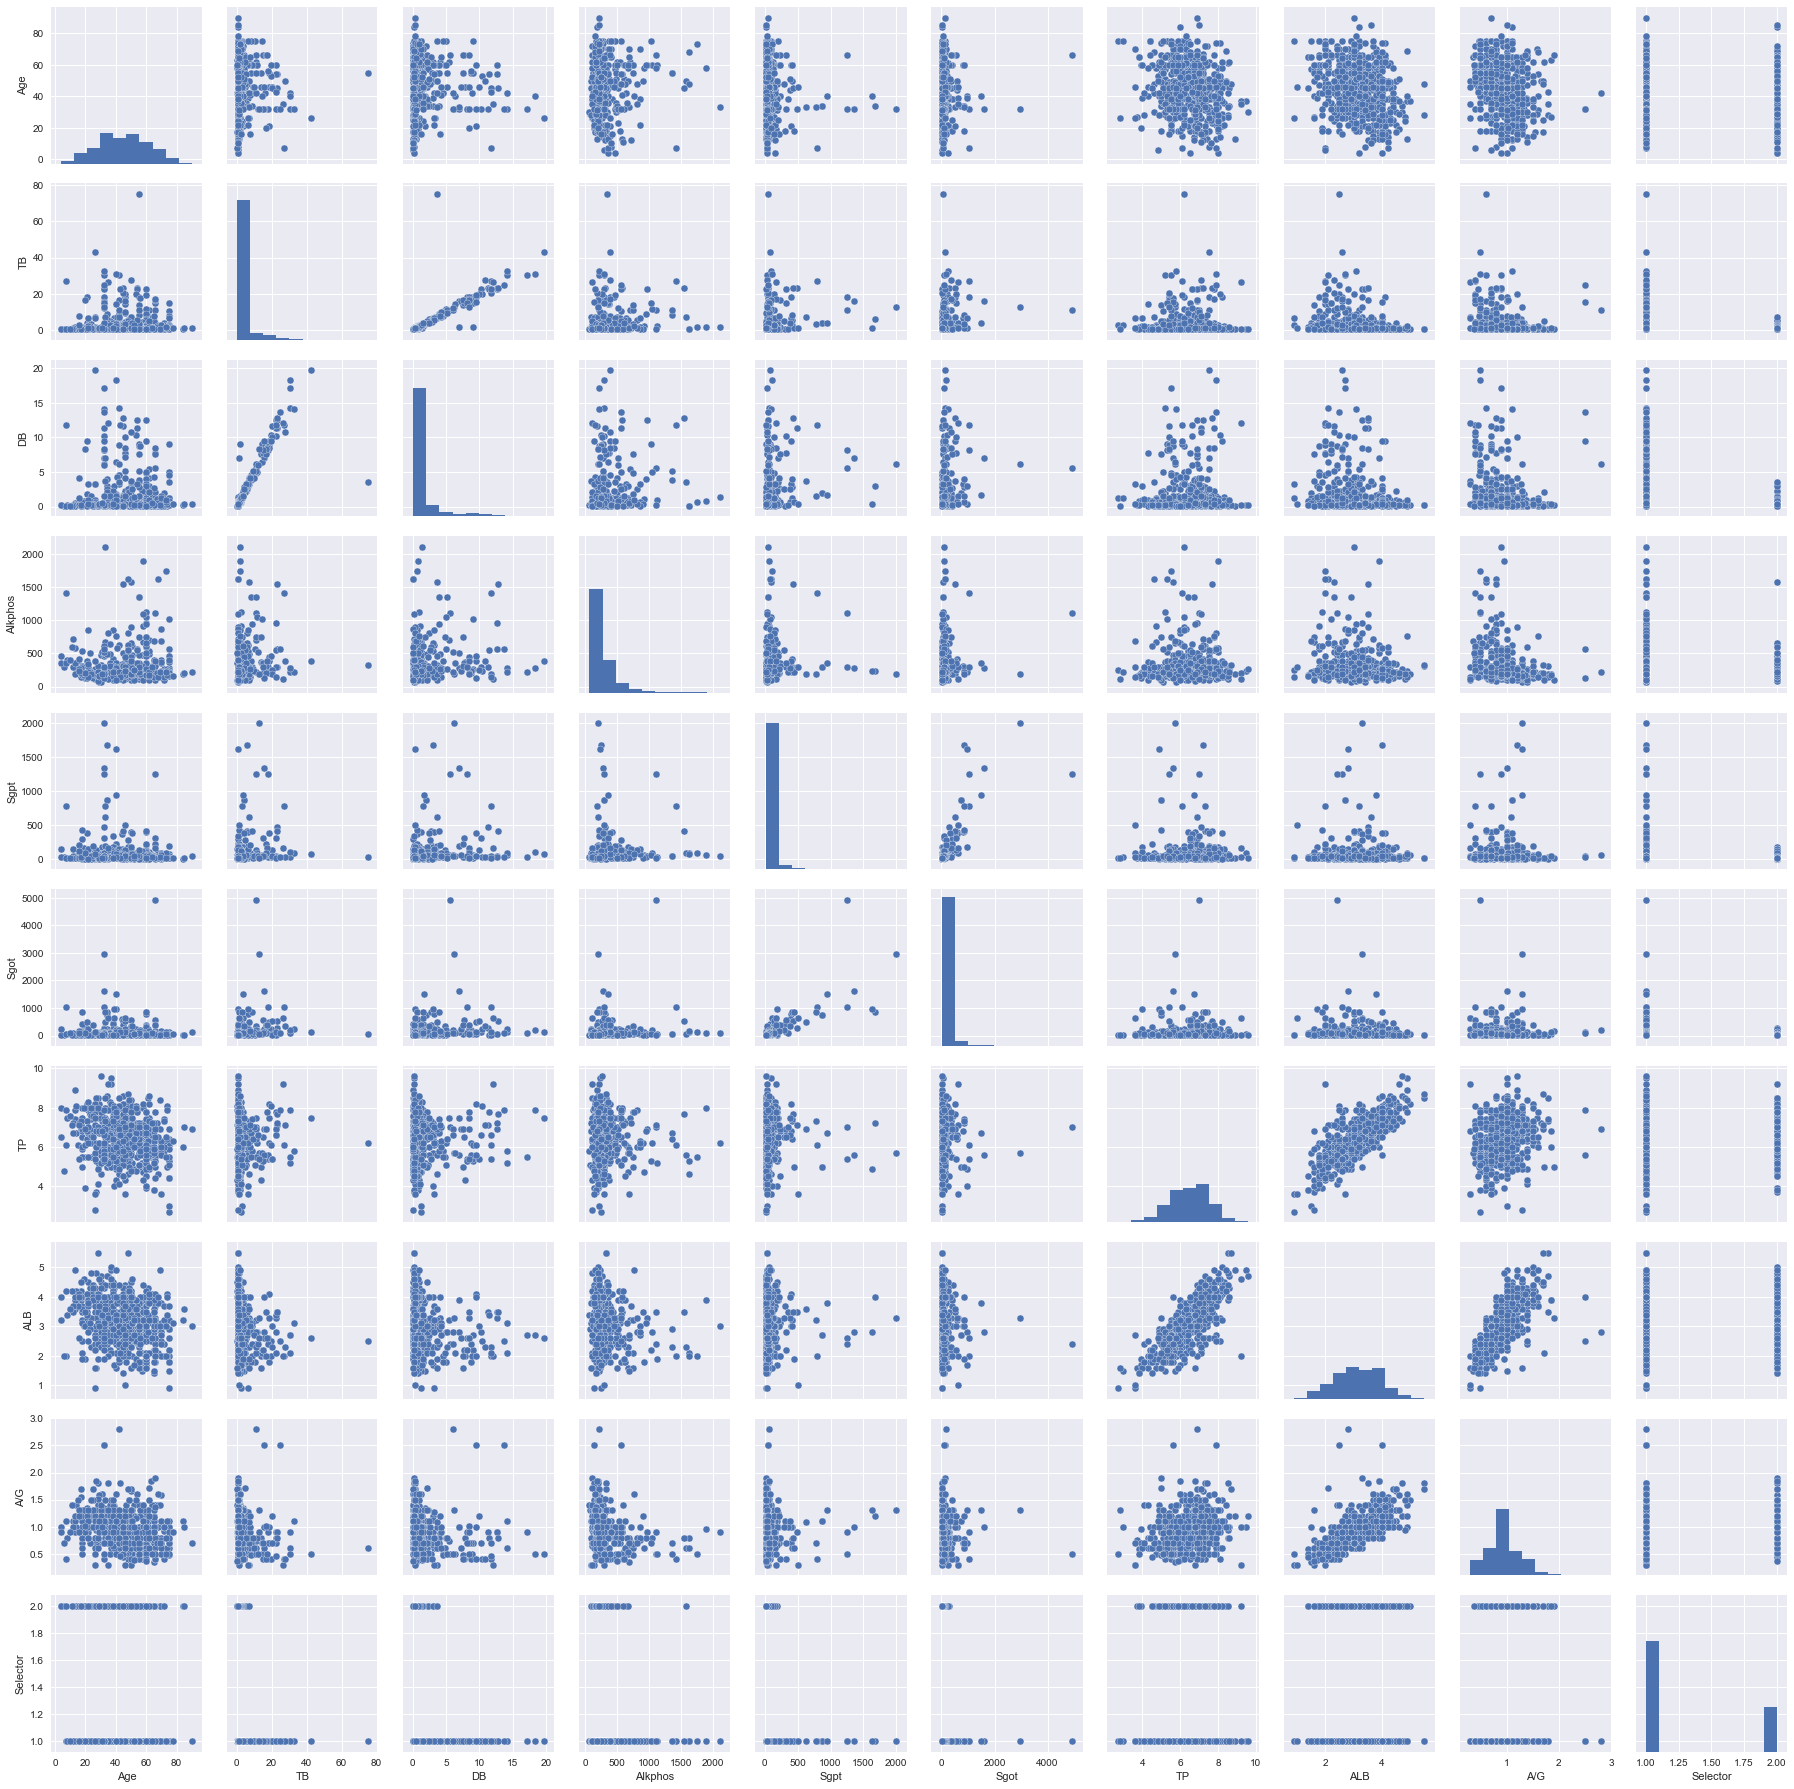

In [19]:
sns.pairplot(df)

In [20]:
# Looks like there may be some linear correlations between some of the features. More data visualizations

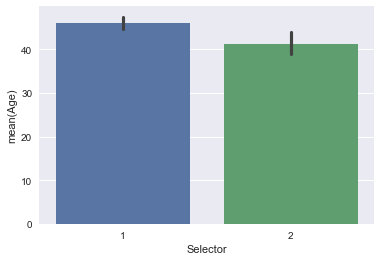

In [21]:
sns.barplot(x='Selector',y='Age',data =df)

In [22]:
# Mean Age is roughly the same for both selctors

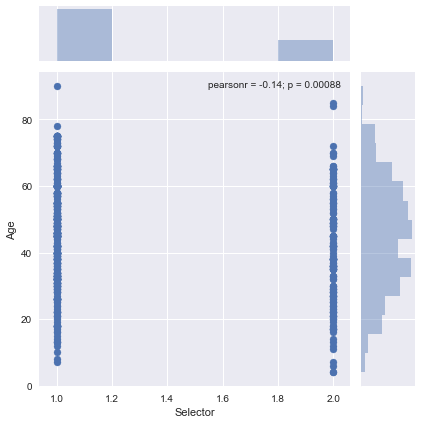

In [23]:
sns.jointplot(x='Selector',y='Age',data =df)

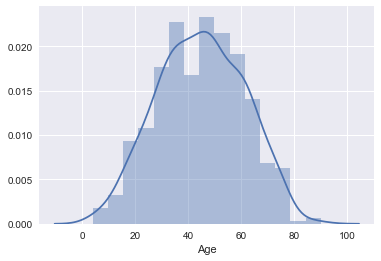

In [24]:
sns.distplot(df['Age'])

In [25]:
# Age looks almost normally distributed

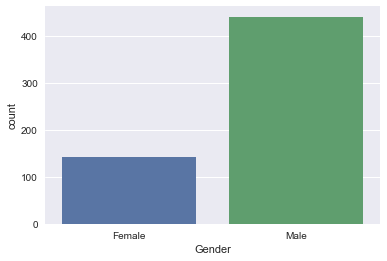

In [26]:
sns.countplot(x='Gender',data=df)

In [27]:
# More Males than Females in the dataset

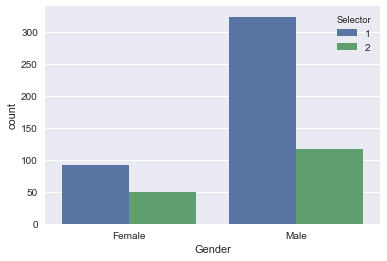

In [28]:
sns.countplot(x='Gender',data=df,hue='Selector')

In [29]:
# The percentage of females falling under category 2 is higher than that of of males when compared to the total of
#their gender.

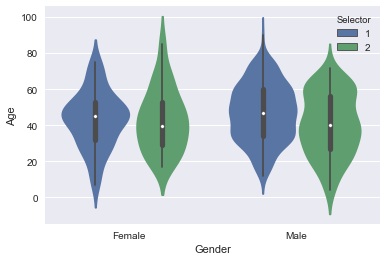

In [30]:
sns.violinplot(x='Gender',y='Age',hue='Selector',data=df)

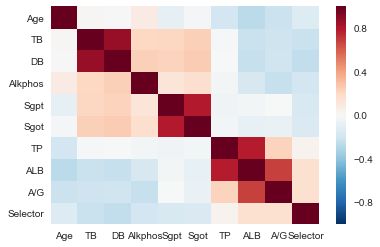

In [31]:
sns.heatmap(df.corr())

In [32]:
# Some of the features are highly correlated

# Preparing data for Machine Learning Algorithms

In [33]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


# Using pd.get_dummies instead to turn categorical data into inegers

In [34]:
# Encoding gender 

In [35]:
Gender = pd.get_dummies(df.iloc[: ,1], drop_first=True)

In [36]:
df = pd.concat([df,Gender],axis=1)

In [37]:
df.head()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector,Male
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [38]:
df.drop('Gender',axis=1,inplace=True)

In [39]:
df.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector,Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1


In [40]:
#Encoding Selector and Renaming it as Prognosis

In [41]:
Result = pd.get_dummies(df['Selector'],drop_first=True)

In [42]:
df=pd.concat([df,Result],axis=1)

In [43]:
df.head(10)

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Selector,Male,2
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,1,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,1,0
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1,1,0
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,1,0,0
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,1,0,0
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,2,1,1
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1,1,0


In [44]:
df.drop('Selector',axis=1,inplace=True)

In [45]:
# This turned the categories in the Selector column: Category 2 is now category 1 and Category 1 is now category 0

In [46]:
df.head()

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Male,2
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0


In [47]:
#renaming column 2 to Prognosis

In [48]:
df['Prognosis'] = df[2]

In [49]:
df.drop(2,axis=1,inplace=True)

In [50]:
df.head(10)

,Age,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G,Male,Prognosis
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,1,0
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,1,0
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,1,0
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,1,0
5,46,1.8,0.7,208,19,14,7.6,4.4,1.30,1,0
6,26,0.9,0.2,154,16,12,7.0,3.5,1.00,0,0
7,29,0.9,0.3,202,14,11,6.7,3.6,1.10,0,0
8,17,0.9,0.3,202,22,19,7.4,4.1,1.20,1,1
9,55,0.7,0.2,290,53,58,6.8,3.4,1.00,1,0


In [51]:
# Droping total protein columns from table

In [208]:
df.drop(['TB','TP'], axis = 1, inplace=True)

In [209]:
df.head()

,Age,DB,Alkphos,Sgpt,Sgot,ALB,A/G,Male,Prognosis
0,65,0.1,187,16,18,3.3,0.90,0,0
1,62,5.5,699,64,100,3.2,0.74,1,0
2,62,4.1,490,60,68,3.3,0.89,1,0
3,58,0.4,182,14,20,3.4,1.00,1,0
4,72,2.0,195,27,59,2.4,0.40,1,0


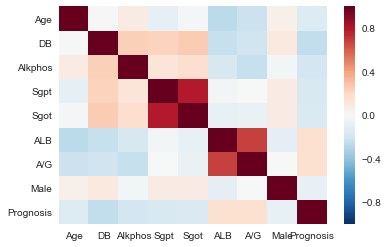

In [210]:
sns.heatmap(df.corr())

In [211]:
#checking if target variable is imbalanced

In [212]:
df['Prognosis'].value_counts()

0    416
1    167
Name: Prognosis, dtype: int64

# Data is unbalanced - Balancing it by Up-sampling the minority class

In [213]:
from sklearn.utils import resample

In [214]:
# Creating 2 different dataframes df_majority and df_minority

In [215]:
df_majority = df[df['Prognosis']==0]

In [216]:
df_minority = df[df['Prognosis']==1]

In [217]:
# Upsample minority class

In [218]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=416, random_state=123)

In [219]:
# Combine majority class with upsampled minority class

In [220]:
df_upsampled = pd.concat([df_majority,df_minority_upsampled])

In [221]:
df_upsampled['Prognosis'].value_counts()

1    416
0    416
Name: Prognosis, dtype: int64

# Spliting the dataset into independent variables X and dependent variable y and into test and train sets

In [222]:
X =df_upsampled.drop('Prognosis', axis=1)

In [223]:
y = df_upsampled['Prognosis']

# Feature Scaling

In [224]:
from sklearn.preprocessing import StandardScaler

In [225]:
sc_X = StandardScaler()

In [226]:
X = sc_X.fit_transform(X)

# PCA (Principal Component Analysis)

In [227]:
from sklearn.decomposition import PCA

In [228]:
pca = PCA(n_components=4)

In [229]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [230]:
X_pca = pca.transform(X)

# Spliting Data into Test and Train Data

In [231]:
from sklearn.model_selection import train_test_split

In [232]:
X_train,X_test,y_train,y_test = train_test_split(X_pca,y,test_size=0.3,random_state=101)

# Trying Several Machine Learning Classification Algorithms

1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine (SVM)
5. K-Nearest Neighbors (K-NN)
6. Naive Bayes
7. Kernel SVM (maybe)
8. Neural Networks

# 1. Logistic Regression

In [233]:
from sklearn.linear_model import LogisticRegression

In [234]:
logmodel = LogisticRegression()

In [235]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [236]:
predictions = logmodel.predict(X_test)

In [237]:
from sklearn.metrics import classification_report,confusion_matrix

In [238]:
print(classification_report(y_test,predictions))
print ('\n')
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       0.75      0.55      0.63       128
          1       0.63      0.81      0.71       122

avg / total       0.69      0.68      0.67       250



[[70 58]
 [23 99]]


In [239]:
# Performing k-fold cross validation score

In [240]:
from sklearn.model_selection import cross_val_score

In [241]:
l_accuracies = cross_val_score(estimator= logmodel,X = X_train, y = y_train, cv =10)

In [242]:
l_accuracies

array([ 0.69491525,  0.6779661 ,  0.72881356,  0.74576271,  0.75862069,
        0.79310345,  0.72413793,  0.68965517,  0.75438596,  0.64912281])

In [243]:
l_accuracies.mean()

0.72164836404277799

In [244]:
l_accuracies.std()

0.041339922724679581

# ROC Curve for Linear Regression

In [245]:
#Getting predicted probabilities that observations will be in one class or the other

In [246]:
prob_predict = logmodel.predict_proba(X_test)

In [247]:
#Keeping only probabilities of class 1

In [248]:
prob_predict =[p[1] for p in prob_predict]

In [249]:
# Taking a look at some probabilities

In [250]:
prob_predict[:5]

[0.58582883368979555,
 0.50062967178702078,
 0.63368154138497057,
 0.50263668171330111,
 0.56704367751985973]

In [251]:
#Importing library for area under Receiver Operating Charactristic Curve

In [252]:
from sklearn.metrics import roc_auc_score

In [253]:
print(roc_auc_score(y_test,prob_predict))

0.706647028689


# 2. Decision Tree

In [254]:
from sklearn.tree import DecisionTreeClassifier

In [255]:
dtree = DecisionTreeClassifier()

In [256]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [257]:
tree_predictions = dtree.predict(X_test)

In [258]:
print(classification_report(y_test,tree_predictions))
print('\n')
print(confusion_matrix(y_test,tree_predictions))

             precision    recall  f1-score   support

          0       0.91      0.70      0.79       128
          1       0.75      0.93      0.83       122

avg / total       0.83      0.81      0.81       250



[[ 90  38]
 [  9 113]]


In [259]:
# Performing K-fold cross validation score

In [260]:
from sklearn.model_selection import cross_val_score

In [261]:
tree_accuracies = cross_val_score (estimator= dtree, X = X_train, y = y_train, cv = 10)

In [262]:
tree_accuracies

array([ 0.79661017,  0.6779661 ,  0.74576271,  0.91525424,  0.93103448,
        0.81034483,  0.87931034,  0.86206897,  0.78947368,  0.78947368])

In [263]:
tree_accuracies.mean()

0.8197299209449691

In [264]:
tree_accuracies.std()

0.074079439234848457

# ROC curve for Decision Trees

In [265]:
tree_proba = dtree.predict_proba(X_test)

In [266]:
tree_proba = [p[1] for p in tree_proba]

In [267]:
tree_proba[:5]

[0.0, 0.0, 1.0, 0.0, 0.0]

In [268]:
print(roc_auc_score(y_test,tree_proba))

0.814677254098


# 3. Random Forest

In [269]:
from sklearn.ensemble import RandomForestClassifier

In [270]:
rfc = RandomForestClassifier(n_estimators=10)

In [271]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [272]:
rfc_predictions = rfc.predict(X_test)

In [273]:
print(classification_report(y_test,rfc_predictions))
print('\n')
print(confusion_matrix(y_test,rfc_predictions))

             precision    recall  f1-score   support

          0       0.85      0.73      0.79       128
          1       0.76      0.87      0.81       122

avg / total       0.81      0.80      0.80       250



[[ 94  34]
 [ 16 106]]


In [274]:
# Performing K-fold cross validation score

In [275]:
rfc_accuracies = cross_val_score(estimator= rfc, X = X_train, y = y_train, cv =10)

In [276]:
rfc_accuracies

array([ 0.83050847,  0.71186441,  0.76271186,  0.88135593,  0.87931034,
        0.82758621,  0.81034483,  0.79310345,  0.78947368,  0.84210526])

In [277]:
rfc_accuracies.mean()

0.812836445292073

In [278]:
rfc_accuracies.std()

0.049142103432175663

# ROC Curve for Random Forest

In [279]:
forest_proba = rfc.predict_proba(X_test)

In [280]:
forest_proba = [p[1] for p in forest_proba]

In [281]:
forest_proba[:5]

[0.59999999999999998,
 0.20000000000000001,
 1.0,
 0.40000000000000002,
 0.40000000000000002]

In [282]:
print(roc_auc_score(y_test,forest_proba))

0.894851434426


# 4 .Support Vector Machines (SVM)

In [284]:
from sklearn.svm import SVC

In [285]:
svc_model = SVC(class_weight='balanced',probability=True)

In [286]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [287]:
svc_predictions=svc_model.predict(X_test)

In [288]:
print(classification_report(y_test,svc_predictions))
print('\n')
print(confusion_matrix(y_test,svc_predictions))

             precision    recall  f1-score   support

          0       0.75      0.52      0.61       128
          1       0.62      0.82      0.70       122

avg / total       0.69      0.66      0.66       250



[[ 66  62]
 [ 22 100]]


In [289]:
# Performing K-Fold cross validation score

In [290]:
from sklearn.model_selection import cross_val_score

In [291]:
svc_accuracies = cross_val_score(estimator= svc_model,X =  X_train, y = y_train, cv = 10)

In [292]:
svc_accuracies

array([ 0.6779661 ,  0.61016949,  0.69491525,  0.76271186,  0.74137931,
        0.75862069,  0.62068966,  0.63793103,  0.73684211,  0.68421053])

In [293]:
svc_accuracies.mean()

0.69254360330985265

In [294]:
svc_accuracies.std()

0.053717441343492663

# ROC curve score for SVM

In [295]:
svc_proba = svc_model.predict_proba(X_test)

In [296]:
svc_proba=[p[1] for p in svc_proba]

In [297]:
svc_proba[:5]

[0.52032670449434404,
 0.42776544835321595,
 0.71297789682359447,
 0.42242117868862772,
 0.5]

In [298]:
print(roc_auc_score(y_test,svc_proba))

0.73059682377


In [299]:
# Need to use Grid Search to find the Best parameters

In [300]:
from sklearn.grid_search import GridSearchCV

In [301]:
param_grid={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.001,0.0001]}

In [302]:
grid = GridSearchCV(SVC(),param_grid,verbose=3)

In [303]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.659794 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.742268 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................... C=0.1, gamma=1, score=0.649485 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.701031 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.685567 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................... C=0.1, gamma=0.1, score=0.644330 -   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ....................... C=1, gamma=0.001, score=0.644330 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.670103 -   0.0s
[CV] C=1, gamma=0.001 ................................................
[CV] ....................... C=1, gamma=0.001, score=0.664948 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.505155 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.505155 -   0.0s
[CV] C=1, gamma=0.0001 ...............................................
[CV] ...................... C=1, gamma=0.0001, score=0.505155 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .......................... C=10, gamma=1, score=0.701031 -   0.0s
[CV] C=10, gamma=1 ...................................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [304]:
grid.best_params_

{'C': 1000, 'gamma': 1}

In [305]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [306]:
grid.best_score_

0.7697594501718213

In [307]:
grid_predictions = grid.predict(X_test)

In [308]:
print(classification_report(y_test,grid_predictions))
print('\n')
print(confusion_matrix(y_test,grid_predictions))

             precision    recall  f1-score   support

          0       0.88      0.69      0.77       128
          1       0.73      0.90      0.81       122

avg / total       0.81      0.79      0.79       250



[[ 88  40]
 [ 12 110]]


In [309]:
# Performing k-fold cross validation score

In [310]:
from sklearn.model_selection import cross_val_score

In [311]:
grid_svc= SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [312]:
grid_accuracy = cross_val_score(estimator=grid_svc, X= X_train, y = y_train, cv =10)

In [313]:
grid_accuracy

array([ 0.66101695,  0.61016949,  0.71186441,  0.79661017,  0.74137931,
        0.77586207,  0.60344828,  0.65517241,  0.64912281,  0.64912281])

In [314]:
grid_accuracy.mean()

0.68537686999497571

In [315]:
grid_accuracy.std()

0.06395401040997116

# 5. K-Nearest Neighbors (K-NN)

In [316]:
from sklearn.neighbors import KNeighborsClassifier

In [317]:
knn = KNeighborsClassifier(n_neighbors=1)

In [318]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [319]:
knn_pred = knn.predict(X_test)

In [320]:
print(classification_report(y_test,knn_pred))
print('\n')
print(confusion_matrix(y_test,knn_pred))

             precision    recall  f1-score   support

          0       0.92      0.63      0.75       128
          1       0.71      0.94      0.81       122

avg / total       0.82      0.78      0.78       250



[[ 81  47]
 [  7 115]]


In [321]:
# Performing K-fold cross validation score 

In [322]:
from sklearn.model_selection import cross_val_score

In [323]:
knn_accuracies = cross_val_score(estimator= knn, X = X_train, y = y_train, cv =10)

In [324]:
knn_accuracies

array([ 0.77966102,  0.72881356,  0.81355932,  0.89830508,  0.82758621,
        0.87931034,  0.82758621,  0.82758621,  0.84210526,  0.8245614 ])

In [325]:
knn_accuracies.mean()

0.8249074615234756

In [326]:
knn_accuracies.std()

0.044804413879440091

# ROC for KNN

In [327]:
knn_proba = knn.predict_proba(X_test)

In [328]:
knn_proba = [p[1] for p in knn_proba]

In [329]:
knn_proba[:5]

[0.0, 0.0, 1.0, 1.0, 0.0]

In [330]:
print(roc_auc_score(y_test,knn_proba))

0.78771772541


In [331]:
# trying to find a better K

In [332]:
error_rate = []
for i in range (1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i !=y_test))

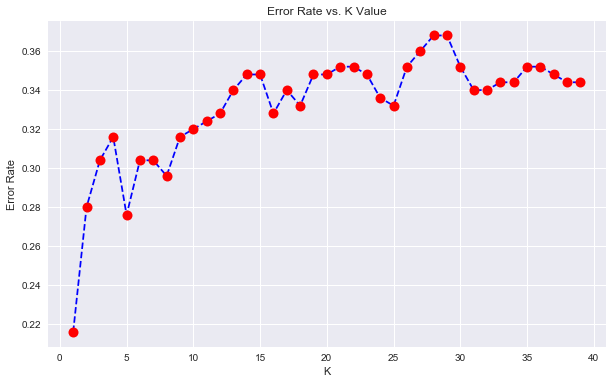

In [333]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color = 'blue', marker = 'o', linestyle = 'dashed',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [334]:
# Go back and put a K of 24 in the model

In [335]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(X_train,y_train)
knn_predictions = knn.predict(X_test)

In [336]:
print(classification_report(y_test,knn_predictions))
print('\n')
print(confusion_matrix(y_test,knn_predictions))

             precision    recall  f1-score   support

          0       0.78      0.45      0.57       128
          1       0.60      0.87      0.71       122

avg / total       0.70      0.66      0.64       250



[[ 58  70]
 [ 16 106]]


In [337]:
# Performing k-fold cross validation score for n=33

In [338]:
knn_33_accuracies = cross_val_score(estimator= knn, X= X_train, y= y_train, cv=10)

In [339]:
knn_33_accuracies

array([ 0.71186441,  0.61016949,  0.6440678 ,  0.76271186,  0.72413793,
        0.75862069,  0.65517241,  0.63793103,  0.73684211,  0.68421053])

In [340]:
knn_33_accuracies.mean()

0.69257282598664971

In [341]:
knn_33_accuracies.std()

0.051193345965506815

# ROC curve score for k=33

In [342]:
knn_33_proba = knn.predict_proba(X_test)

In [343]:
knn_33_proba = [p[1] for p in knn_33_proba]

In [344]:
knn_33_proba[:5]

[0.54545454545454541,
 0.54545454545454541,
 0.69696969696969702,
 0.51515151515151514,
 0.51515151515151514]

In [345]:
print(roc_auc_score(y_test,knn_33_proba))

0.722624231557


# 6. Naive Bayes

In [346]:
from sklearn.naive_bayes import GaussianNB

In [347]:
nb=GaussianNB()

In [348]:
nb.fit(X_train,y_train)

GaussianNB(priors=None)

In [349]:
nb_predictions=nb.predict(X_test)

In [350]:
print(classification_report(y_test,nb_predictions))
print('\n')
print(confusion_matrix(y_test,nb_predictions))

             precision    recall  f1-score   support

          0       0.75      0.40      0.52       128
          1       0.58      0.86      0.69       122

avg / total       0.67      0.62      0.60       250



[[ 51  77]
 [ 17 105]]


In [351]:
# Performing k-fold cross validation score on Naive Bayes

In [352]:
nb_accuracies = cross_val_score(estimator=nb,X=X_train,y=y_train, cv=10)

In [353]:
nb_accuracies

array([ 0.62711864,  0.6779661 ,  0.6440678 ,  0.6779661 ,  0.67241379,
        0.65517241,  0.56896552,  0.65517241,  0.68421053,  0.63157895])

In [354]:
nb_accuracies.mean()

0.64946322556830416

In [355]:
nb_accuracies.std()

0.032790609087762046

# ROC score for Naive Bayes

In [356]:
nb_proba = nb.predict_proba(X_test)

In [357]:
nb_proba = [p[1] for p in nb_proba]

In [358]:
nb_proba[:5]

[0.68571833527348514,
 0.80932504887692913,
 0.853621887264013,
 0.80962926916866806,
 0.67552569645727467]

In [359]:
print(roc_auc_score(y_test,nb_proba))

0.646068135246


# 7. Kernel SVM

In [360]:
from sklearn.svm import SVC

In [361]:
kernel_svm= SVC(kernel='rbf', random_state=101)

In [362]:
kernel_svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=101, shrinking=True,
  tol=0.001, verbose=False)

In [363]:
kernel_predictions=kernel_svm.predict(X_test)

In [364]:
print(classification_report(y_test,kernel_predictions))
print('\n')
print(confusion_matrix(y_test,kernel_predictions))

             precision    recall  f1-score   support

          0       0.76      0.52      0.61       128
          1       0.62      0.83      0.71       122

avg / total       0.69      0.67      0.66       250



[[ 66  62]
 [ 21 101]]


In [365]:
# Performing k-fold cross validation score on Kernel SVM

In [366]:
kernel_accuracies = cross_val_score(estimator = kernel_svm, X= X_train, y= y_train, cv=10)

In [367]:
kernel_accuracies

array([ 0.69491525,  0.61016949,  0.69491525,  0.76271186,  0.74137931,
        0.75862069,  0.62068966,  0.63793103,  0.73684211,  0.68421053])

In [368]:
kernel_accuracies.mean()

0.69423851856409002

In [369]:
kernel_accuracies.std()

0.053497690457171503